## 1. Build DNN Model

In [1]:
# import all dependecies
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers, datasets
from matplotlib import pyplot as plt
import numpy as np

In [2]:
# Dataset acquisition
(x_train_raw, y_train_raw), (x_test_raw, y_test_raw) = datasets.mnist.load_data()

print(y_train_raw[0])
print(x_train_raw.shape, y_train_raw.shape)
print(x_test_raw.shape, y_test_raw.shape)

11490434/11490434 [==============================] - 0s 0us/step
5
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [3]:
'''
    Convert label into one hot code
    Goal --> to make probabilities calculation run indepently
'''

num_class = 10

y_train = keras.utils.to_categorical(y_train_raw, num_class)
y_test = keras.utils.to_categorical(y_test_raw, num_class)

# print the first data label
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


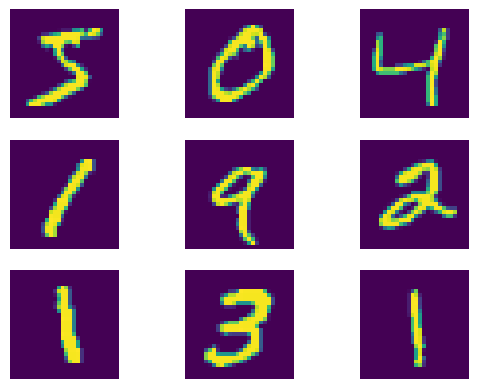

In [4]:
# dataset visualization using matplotlib

plt.figure()
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train_raw[i])
    plt.axis("off")
plt.show()

In [5]:
# reshape image matrix into 1 vector
x_train = x_train_raw.reshape(60000, 784)
x_test = x_test_raw.reshape(10000, 784)

In [6]:
# normalize image pixel into range 0 - 1
x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255

In [7]:
# build DNN Model
model = keras.Sequential([
    layers.Dense(512, activation="relu", input_dim = 784), # input layer
    layers.Dense(256, activation="relu"), # hidden layer
    layers.Dense(124, activation="relu"), # hidden layer
    layers.Dense(num_class, activation="softmax") # output layer
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 124)               31868     
                                                                 
 dense_3 (Dense)             (None, 10)                1250      
                                                                 
Total params: 566,366
Trainable params: 566,366
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Compile The Model
model.compile(
    loss = keras.losses.categorical_crossentropy,
    optimizer = optimizers.Adam(0.001),
    metrics = ["accuracy"]
)

In [9]:
# Fit the model
model.fit(
    x_train,
    y_train,
    batch_size = 128,
    epochs = 10,
    verbose = 1
)

Epoch 1/10
469/469 [==============================] - 11s 4ms/step - loss: 0.2290 - accuracy: 0.9319
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0833 - accuracy: 0.9742
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0559 - accuracy: 0.9815
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0413 - accuracy: 0.9862
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0297 - accuracy: 0.9904
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0265 - accuracy: 0.9915
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0222 - accuracy: 0.9927
Epoch 8/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0184 - accuracy: 0.9934
Epoch 9/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0168 - accuracy: 0.9948
Epoch 10/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0159 - accuracy: 0.994

In [10]:
# Evaluate model
score = model.evaluate(x_test, y_test, verbose = 1)
print("Test loss: ", score[0])
print("Test accuracy: ", score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.1018 - accuracy: 0.9771
Test loss:  0.10176195204257965
Test accuracy:  0.9771000146865845


In [11]:
# Save Weight
model.save("final_DNN.h5")

## 2. Build CNN Model

In [12]:
# Import all dependencies
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten
import numpy as np

In [13]:
# Build Model Layers
model = tf.keras.Sequential()

# First Block Layer
model.add(Conv2D(
    filters = 32,
    kernel_size = 5,
    strides = (1, 1),
    padding = "same",
    activation = "relu",
    input_shape = (28, 28, 1)
))

model.add(MaxPooling2D(
    pool_size = (2, 2),
    strides = (2, 2),
    padding = "valid"
))

# Second Block Layer
model.add(Conv2D(
    filters = 64,
    kernel_size = 3,
    strides = (1, 1),
    padding = "same",
    activation = "relu"
))

model.add(MaxPooling2D(
    pool_size = (2, 2),
    strides = (2, 2),
    padding = "valid"
))

# Add Dropout Regularization
model.add(Dropout(0.25))

# Flatten
model.add(Flatten())

# Add fully connected layer
model.add(Dense(
    units = 128,
    activation = "relu"
))

model.add(Dropout(0.5))

model.add(Dense(
    units = 10,
    activation = "softmax"
))


In [14]:
# Reshape data dimension
X_train = x_train.reshape(60000, 28, 28, 1)
X_test = x_test.reshape(10000, 28, 28, 1)

In [15]:
# Compile the model
model.compile(
    optimizer = "adam",
    loss = "categorical_crossentropy",
    metrics = ["accuracy"]
)

In [16]:
# Fit the model
model.fit(
    x = X_train,
    y = y_train,
    epochs = 5,
    batch_size = 128
)

Epoch 1/5
469/469 [==============================] - 10s 6ms/step - loss: 0.2749 - accuracy: 0.9144
Epoch 2/5
469/469 [==============================] - 3s 5ms/step - loss: 0.0921 - accuracy: 0.9731
Epoch 3/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0681 - accuracy: 0.9799
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0561 - accuracy: 0.9830
Epoch 5/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0501 - accuracy: 0.9847


In [17]:
# Evaluate CNN Model
test_loss, test_acc = model.evaluate(x = X_test, y = y_test)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_acc}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0279 - accuracy: 0.9911
Test loss: 0.027921155095100403
Test accuracy: 0.991100013256073


In [18]:
# save the model
model.save("final_CNN_model.h5")

In [19]:
# Load model and predict
from tensorflow.keras.models import load_model
new_model = load_model("final_CNN_model.h5")
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 7, 7, 64)          0         
                                                                 
 flatten (Flatten)           (None, 3136)             

In [20]:
# visualize prediction results
def res_Visual(total_prediction):
    final_opt_a = new_model.predict(X_test[0:total_prediction])
    final_opt_a = final_opt_a.argmax(axis=-1)
    fig, ax = plt.subplots(nrows=int(total_prediction/5), ncols=5)
    ax = ax.flatten()
    print("Prediction results of the first {} images: ".format(total_prediction))
    for i in range(total_prediction):
        print(final_opt_a[i], end = ",")
        if int((i + 1) % 5) == 0:
            print("\t")

        # visualize image display
        img = X_test[i].reshape((28, 28))
        plt.axis("off")
        ax[i].imshow(img, cmap = "Greys", interpolation = "nearest") # Visualization
        ax[i].axis("off")
    print("first {} images in the test set: ".format(total_prediction))

1/1 [==============================] - 0s 154ms/step
Prediction results of the first 20 images: 
7,2,1,0,4,	
1,4,9,5,9,	
0,6,9,0,1,	
5,9,7,3,4,	
first 20 images in the test set: 


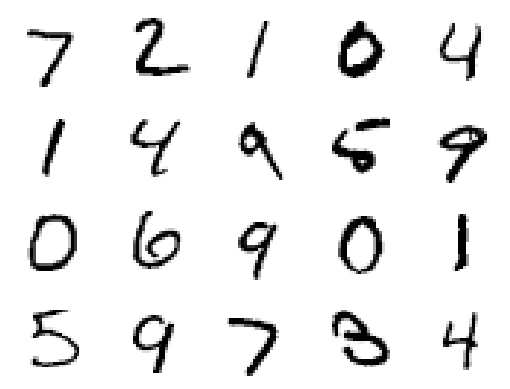

In [21]:
# call the procedur to visualize the twenty-first actual images and prediction
res_Visual(20)

313/313 [==============================] - 1s 2ms/step
['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       0.99      1.00      0.99      1135
           2       0.99      1.00      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.98      1.00      0.99       892
           6       1.00      0.98      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



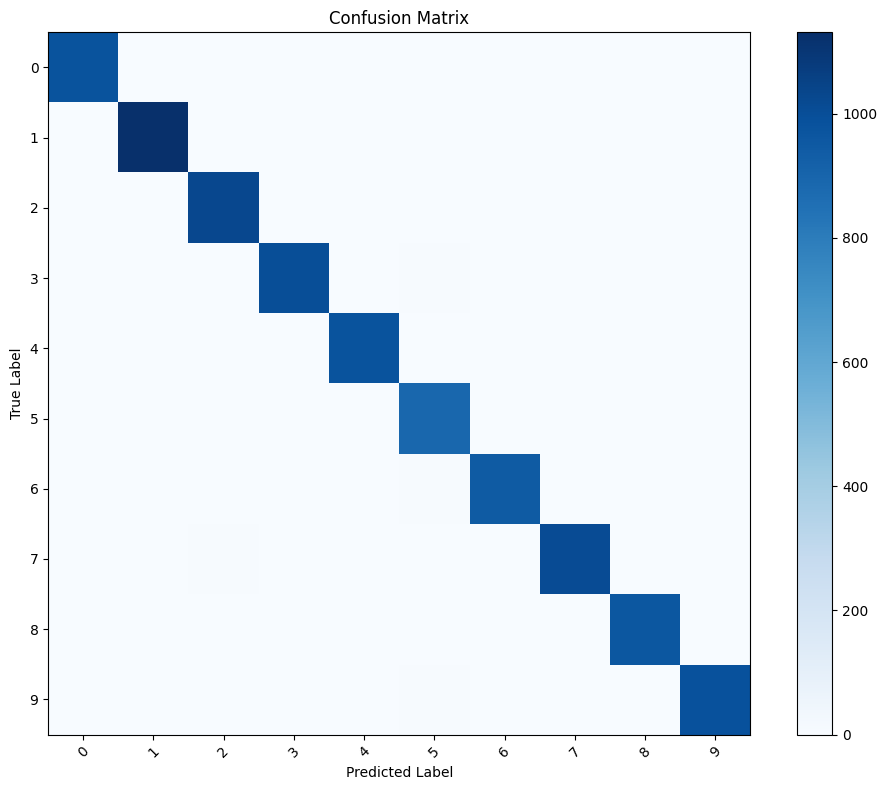

In [22]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report


# Make predictions
y_true = np.argmax(y_test, axis=1) # convert one hot encoding label into indivdual integer number
# print(y_true)
y_pred_prob = new_model.predict(X_test, verbose=1)
y_pred = y_pred_prob.argmax(axis=-1)

# Create confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Print classification report
target_names = np.unique(y_true).astype(str) # get class name by get the unique class id, then convert it into string for plot requirement
print(target_names)
print(classification_report(y_true, y_pred, target_names=target_names))

# Plot confusion matrix
plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(target_names))
plt.xticks(tick_marks, target_names, rotation=45)
plt.yticks(tick_marks, target_names)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

### Analisis:
#### 1. Merujuk pada classification report, data test yang berjumlah 10.000 menghasilkan rerata akurasi pada angka 99%.
#### 2. Jumlah sample pada data test dikategorikan balance dengan jumlah sample terendah pada class 5 dengan total sample 892 (akurasi 99%) dan sample tertinggi pada class 1 dengan total sample 1135 (akurasi 100%).
#### 3. Hasil mutakhir disebabkan oleh kuantitas sample yang mumpuni dan standarisasi dataset dengan digit angka tanpa terpotong dan terletak di tengah-tengah citra.
#### 4. Dataset ini dapat dikembangkan lagi dengan memvariasikan tata letak digit angka, berikan sample digit angka yang terpotong, memvariasikan orientasi sudut pengambilan gambar sehingga dataset menjadi lebih representatif.

## 3. Image Classification

In [23]:
# import all dependencies
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers, datasets, Sequential
from tensorflow.keras.layers import Conv2D,Activation,MaxPooling2D,Dropout,Flatten,Dense
import os
import numpy as np
import matplotlib.pyplot as plt

In [24]:
# retrieve the cifar-10 dataset

(x_train,y_train), (x_test, y_test) = datasets.cifar10.load_data()
#print the size of the dataset
print(f"Train Shape{x_train.shape};\nTrain Label Shape: {y_train.shape};\nTest Shape: {x_test.shape};\nTest Label Shape: {y_test.shape};")
print(f"Label from the first image: {y_train[0]}")

# Convert the category label into onehot encoding
num_classes = 10
y_train_onehot = keras.utils.to_categorical(y_train, num_classes)
y_test_onehot = keras.utils.to_categorical(y_test, num_classes)

170498071/170498071 [==============================] - 2s 0us/step
Train Shape(50000, 32, 32, 3);
Train Label Shape: (50000, 1);
Test Shape: (10000, 32, 32, 3);
Test Label Shape: (10000, 1);
Label from the first image: [6]


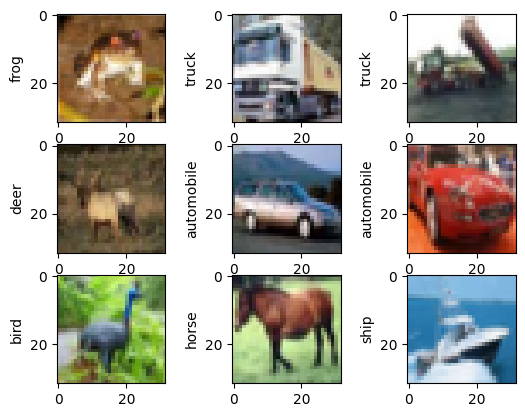

In [25]:
# Create a image tag list
category_dict = {0:'airplane',1:'automobile',2:'bird',3:'cat',4:'deer',5:'dog',
 6:'frog',7:'horse',8:'ship',9:'truck'}

# Show the first 9 images and their labels
plt.figure()
for i in range(9):
  #create a figure with 9 subplots
  plt.subplot(3,3,i+1)
  #show an image
  plt.imshow(x_train[i])
  #show the label
  plt.ylabel(category_dict[y_train[i][0]])
plt.show()

In [26]:
# Pixel normalization --> pixel range 0 -- 1
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [27]:
print(x_train.shape[1:])

(32, 32, 3)


In [28]:
# Model Building

def CNN_classification_model(input_size = x_train.shape[1:]): # input size = (32, 32, 3)
  model = Sequential()

  # First Block
  model.add(Conv2D(32, (3, 3), padding = "same",
                   input_shape = input_size))
  model.add(Activation("relu"))
  model.add(Conv2D(32, (3, 3)))
  model.add(Activation("relu"))
  model.add(MaxPooling2D(pool_size = (2, 2), strides = 1))

  # Second Block
  model.add(Conv2D(64, (3, 3), padding = "same"))
  model.add(Activation("relu"))
  model.add(Conv2D(64, (3, 3)))
  model.add(Activation("relu"))
  model.add(MaxPooling2D(pool_size = (2, 2)))

  # Fully Connected Layer
  model.add(Flatten())
  model.add(Dense(128))
  model.add(Activation("relu"))
  model.add(Dropout(0.25))
  model.add(Dense(10))
  model.add(Activation("softmax"))

  optimizer_config = keras.optimizers.Adam(lr = 0.0001)

  model.compile(loss = "sparse_categorical_crossentropy", optimizer = optimizer_config, metrics = ["accuracy"])

  return model

In [29]:
# Invoke the model
model = CNN_classification_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 29, 29, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 29, 29, 64)        18496     
                                                      

In [30]:
# Add pretrained model and Tensorflow Callback
from tensorflow.keras.callbacks import ModelCheckpoint

model_name = "final_cifar10.h5"
model_checkpoint = ModelCheckpoint(model_name, monitor = "loss", verbose = 1, save_best_only = True)

trained_weights_path = "cifar10_weights.h5"
if os.path.exists(trained_weights_path):
  model.load_weighths(trained_weights_path, by_name = True)

# Fit the model
model.fit(x_train, y_train, batch_size = 32, epochs = 10, callbacks = [model_checkpoint], verbose = 1)

Epoch 1/10
1563/1563 [==============================] - ETA: 0s - loss: 1.5257 - accuracy: 0.4431
Epoch 1: loss improved from inf to 1.52570, saving model to final_cifar10.h5
1563/1563 [==============================] - 14s 7ms/step - loss: 1.5257 - accuracy: 0.4431
Epoch 2/10
1560/1563 [============================>.] - ETA: 0s - loss: 1.1168 - accuracy: 0.6051
Epoch 2: loss improved from 1.52570 to 1.11621, saving model to final_cifar10.h5
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1162 - accuracy: 0.6054
Epoch 3/10
1560/1563 [============================>.] - ETA: 0s - loss: 0.9508 - accuracy: 0.6659
Epoch 3: loss improved from 1.11621 to 0.95074, saving model to final_cifar10.h5
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9507 - accuracy: 0.6661
Epoch 4/10
1555/1563 [============================>.] - ETA: 0s - loss: 0.8461 - accuracy: 0.7012
Epoch 4: loss improved from 0.95074 to 0.84600, saving model to final_cifar10.h5
1563/1563 [=

In [32]:
new_model = CNN_classification_model()
new_model.load_weights('final_cifar10.h5')
score = model.evaluate(x_test, y_test, verbose=1)
print("Test loss: ", score[0])
print("Test accuracy: ", score[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.9471 - accuracy: 0.7177
Test loss:  0.9471390843391418
Test accuracy:  0.7177000045776367


In [40]:
# output the possibility of each class
model_prediction = new_model.predict(x_test[0:1])
print(model_prediction)
print(f"Highest score at class: ", model_prediction.argmax(axis = -1))

1/1 [==============================] - 0s 28ms/step
[[8.4455730e-03 5.4670007e-05 1.6087291e-03 8.1941462e-01 9.0943312e-04
  1.5326889e-01 2.6344084e-03 1.9518716e-03 1.1088202e-02 6.2360457e-04]]
Highest score at class:  [3]


1/1 [==============================] - 0s 27ms/step


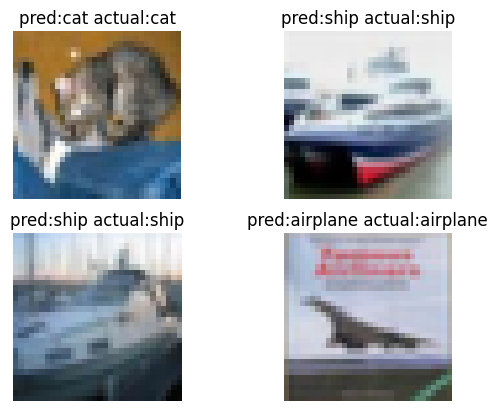

In [43]:
#label list
pred_list = []
plt.figure()
for i in range(0, 4):
  plt.subplot(2, 2, i + 1)
  #plot
  plt.imshow(x_test[i])
  #predict
  pred = new_model.predict(x_test[0:10]).argmax(axis = -1)
  pred_list.append(pred)
  #Display actual and predicted labels of images
  plt.title("pred:" + category_dict[pred[i]] + " actual:" + category_dict[y_test[i][0]])
  plt.axis('off')
plt.show()

313/313 [==============================] - 1s 4ms/step
[[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]
['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']
              precision    recall  f1-score   support

           0       0.73      0.79      0.76      1000
           1       0.83      0.85      0.84      1000
           2       0.64      0.55      0.59      1000
           3       0.51      0.56      0.54      1000
           4       0.70      0.60      0.64      1000
           5       0.58      0.66      0.62      1000
           6       0.82      0.75      0.78      1000
           7       0.79      0.73      0.76      1000
           8       0.80      0.85      0.83      1000
           9       0.81      0.83      0.82      1000

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.72     10000
weighted avg       0.72      0.72      0.72     10000



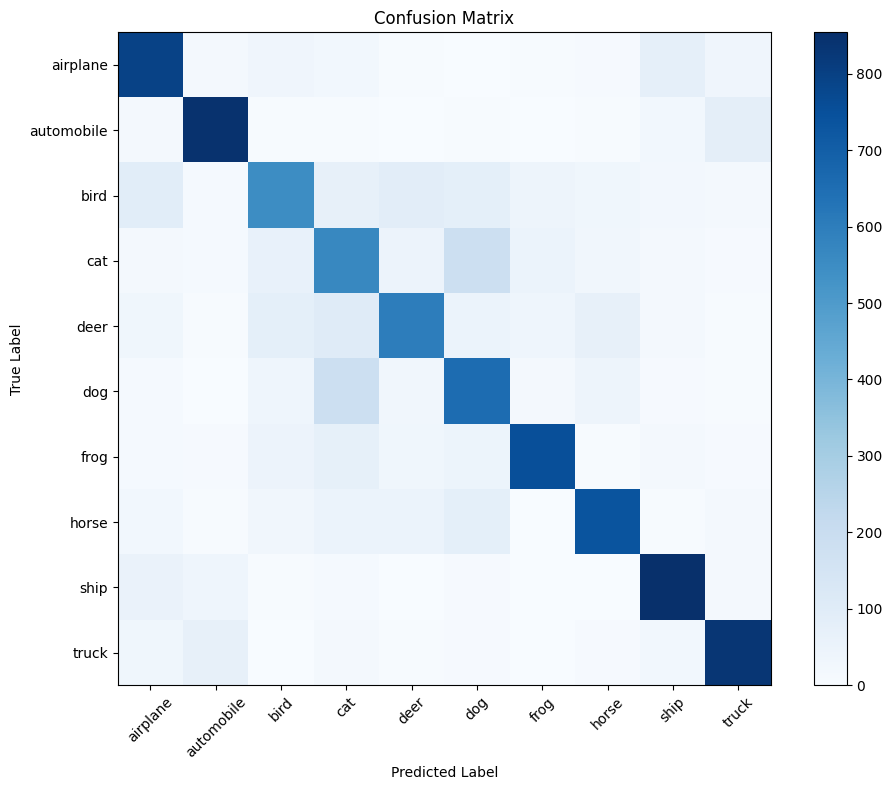

In [78]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report


# Make predictions
# y_true = np.argmax(y_test, axis=1) # convert one hot encoding label into indivdual integer number
# print(y_true)
y_pred_prob = new_model.predict(x_test, verbose=1)
y_pred = y_pred_prob.argmax(axis=-1)

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print classification report

target_names = np.unique(y_test).astype(str)
print(y_test)
print(target_names)
print(classification_report(y_test, y_pred, target_names=target_names))

# Plot confusion matrix
plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

target_names = [str(value) for value in category_dict.values()]
# print(target_names)

tick_marks = np.arange(len(target_names))
plt.xticks(tick_marks, target_names, rotation=45)
plt.yticks(tick_marks, target_names)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

## 4. Image Classification with More Epoch and Early Stopping without Validation Splitting

In [82]:
callbacks = [
    # Define Early stopping:
    tf.keras.callbacks.EarlyStopping(
        monitor = "loss",
        patience = 2,
    ),

    # Define ModelCheckpoint
    tf.keras.callbacks.ModelCheckpoint(
        filepath = "CNN_more_epoch_early_stopping.h5",
        save_best_only = True,
        monitor = "loss"
    )
]

max_epochs = 500

In [84]:
# Fit the model
improved_model = CNN_classification_model()
improved_model.fit(x_train, y_train, batch_size = 32, epochs = max_epochs, callbacks = callbacks, verbose = 1)

Epoch 1/500
1563/1563 [==============================] - 13s 7ms/step - loss: 1.5015 - accuracy: 0.4517
Epoch 2/500
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0935 - accuracy: 0.6130
Epoch 3/500
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9192 - accuracy: 0.6785
Epoch 4/500
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8045 - accuracy: 0.7172
Epoch 5/500
1563/1563 [==============================] - 10s 7ms/step - loss: 0.7016 - accuracy: 0.7495
Epoch 6/500
1563/1563 [==============================] - 10s 7ms/step - loss: 0.6265 - accuracy: 0.7748
Epoch 7/500
1563/1563 [==============================] - 11s 7ms/step - loss: 0.5530 - accuracy: 0.8022
Epoch 8/500
1563/1563 [==============================] - 10s 7ms/step - loss: 0.4881 - accuracy: 0.8226
Epoch 9/500
1563/1563 [==============================] - 10s 7ms/step - loss: 0.4375 - accuracy: 0.8399
Epoch 10/500
1563/1563 [==============================] - 10s 7m

In [106]:
new_model_1 = CNN_classification_model()
new_model_1.load_weights('CNN_more_epoch_early_stopping.h5')
score = new_model_1.evaluate(x_test, y_test, verbose=1)
print("Test loss: ", score[0])
print("Test accuracy: ", score[1])

313/313 [==============================] - 2s 6ms/step - loss: 1.7055 - accuracy: 0.7148
Test loss:  1.7054500579833984
Test accuracy:  0.7148000001907349


313/313 [==============================] - 1s 3ms/step
[[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]
['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']
              precision    recall  f1-score   support

           0       0.76      0.72      0.74      1000
           1       0.80      0.87      0.83      1000
           2       0.62      0.57      0.59      1000
           3       0.55      0.46      0.50      1000
           4       0.69      0.62      0.65      1000
           5       0.57      0.67      0.62      1000
           6       0.75      0.80      0.77      1000
           7       0.73      0.81      0.77      1000
           8       0.82      0.83      0.82      1000
           9       0.82      0.81      0.81      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000



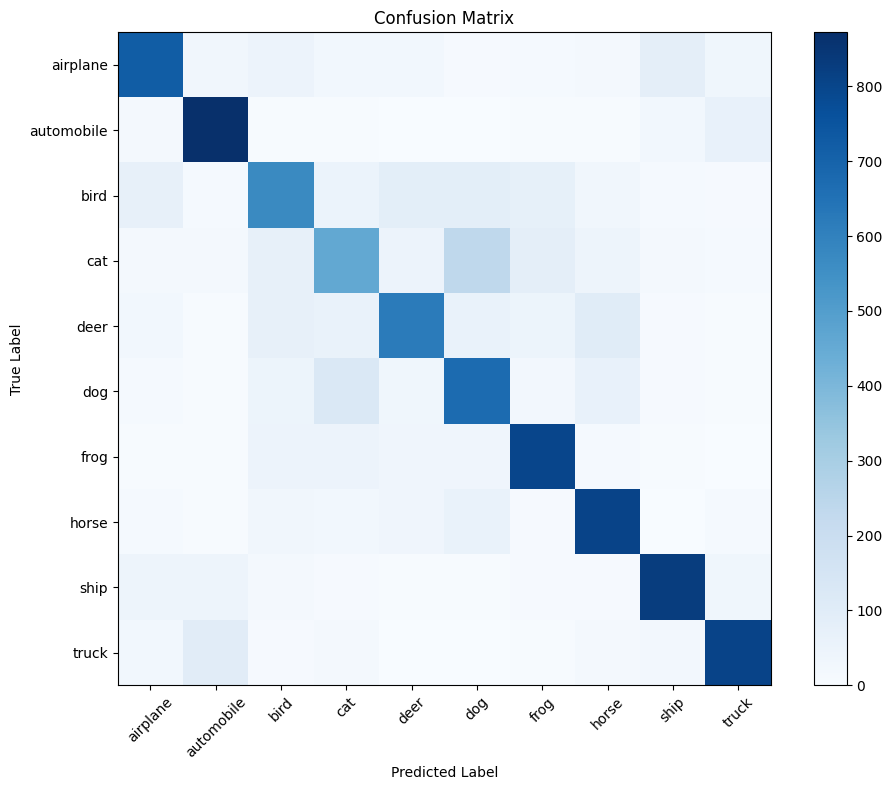

In [107]:
y_pred_prob = new_model_1.predict(x_test, verbose=1)
y_pred = y_pred_prob.argmax(axis=-1)

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print classification report

target_names = np.unique(y_test).astype(str)
print(y_test)
print(target_names)
print(classification_report(y_test, y_pred, target_names=target_names))

# Plot confusion matrix
plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

target_names = [str(value) for value in category_dict.values()]
# print(target_names)

tick_marks = np.arange(len(target_names))
plt.xticks(tick_marks, target_names, rotation=45)
plt.yticks(tick_marks, target_names)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

## 5. Image Classification with More Epoch and Early Stopping with Validation Splitting

In [94]:

import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import cifar10

# Set a seed for reproducibility
seed = 42

# Split into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=seed)

# Print the shapes of the resulting sets
print("x_train shape:", x_train.shape)
print("x_val shape:", x_val.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)

x_train shape: (32000, 32, 32, 3)
x_val shape: (8000, 32, 32, 3)
y_train shape: (32000, 1)
y_val shape: (8000, 1)


In [103]:
callbacks = [
    # Define Early stopping:
    tf.keras.callbacks.EarlyStopping(
        monitor = "val_loss",
        patience = 10,
    ),

    # Define ModelCheckpoint
    tf.keras.callbacks.ModelCheckpoint(
        filepath = "CNN_more_epoch_early_stopping_with_validation_set.h5",
        save_best_only = True,
        monitor = "val_loss"
    ),

    tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
        factor=0.1, patience=5,
        min_lr=1e-6, verbose=1),
]

max_epochs = 500

In [104]:
# Fit the model
improved_model_with_validation_set = CNN_classification_model()
improved_model_with_validation_set.fit(x_train, y_train, batch_size = 64, epochs = max_epochs, callbacks = callbacks, validation_data=(x_val, y_val), verbose = 1)

Epoch 1/500
500/500 [==============================] - 8s 11ms/step - loss: 1.5814 - accuracy: 0.4224 - val_loss: 1.2958 - val_accuracy: 0.5370 - lr: 0.0010
Epoch 2/500
500/500 [==============================] - 5s 11ms/step - loss: 1.1923 - accuracy: 0.5762 - val_loss: 1.0236 - val_accuracy: 0.6376 - lr: 0.0010
Epoch 3/500
500/500 [==============================] - 5s 10ms/step - loss: 1.0168 - accuracy: 0.6412 - val_loss: 0.9690 - val_accuracy: 0.6611 - lr: 0.0010
Epoch 4/500
500/500 [==============================] - 5s 11ms/step - loss: 0.8978 - accuracy: 0.6857 - val_loss: 0.9171 - val_accuracy: 0.6773 - lr: 0.0010
Epoch 5/500
500/500 [==============================] - 5s 10ms/step - loss: 0.7891 - accuracy: 0.7209 - val_loss: 0.9004 - val_accuracy: 0.6895 - lr: 0.0010
Epoch 6/500
500/500 [==============================] - 5s 10ms/step - loss: 0.7029 - accuracy: 0.7501 - val_loss: 0.9040 - val_accuracy: 0.6870 - lr: 0.0010
Epoch 7/500
500/500 [==============================] - 5s 

In [108]:
new_model_2 = CNN_classification_model()
new_model_2.load_weights('CNN_more_epoch_early_stopping_with_validation_set.h5')
score = new_model_2.evaluate(x_test, y_test, verbose=1)
print("Test loss: ", score[0])
print("Test accuracy: ", score[1])

313/313 [==============================] - 2s 5ms/step - loss: 0.9130 - accuracy: 0.6844
Test loss:  0.9130042791366577
Test accuracy:  0.6844000220298767


313/313 [==============================] - 1s 4ms/step
[[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]
['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']
              precision    recall  f1-score   support

           0       0.77      0.68      0.72      1000
           1       0.80      0.82      0.81      1000
           2       0.61      0.47      0.53      1000
           3       0.49      0.47      0.48      1000
           4       0.63      0.64      0.63      1000
           5       0.51      0.71      0.59      1000
           6       0.74      0.77      0.76      1000
           7       0.75      0.75      0.75      1000
           8       0.82      0.78      0.80      1000
           9       0.78      0.78      0.78      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000



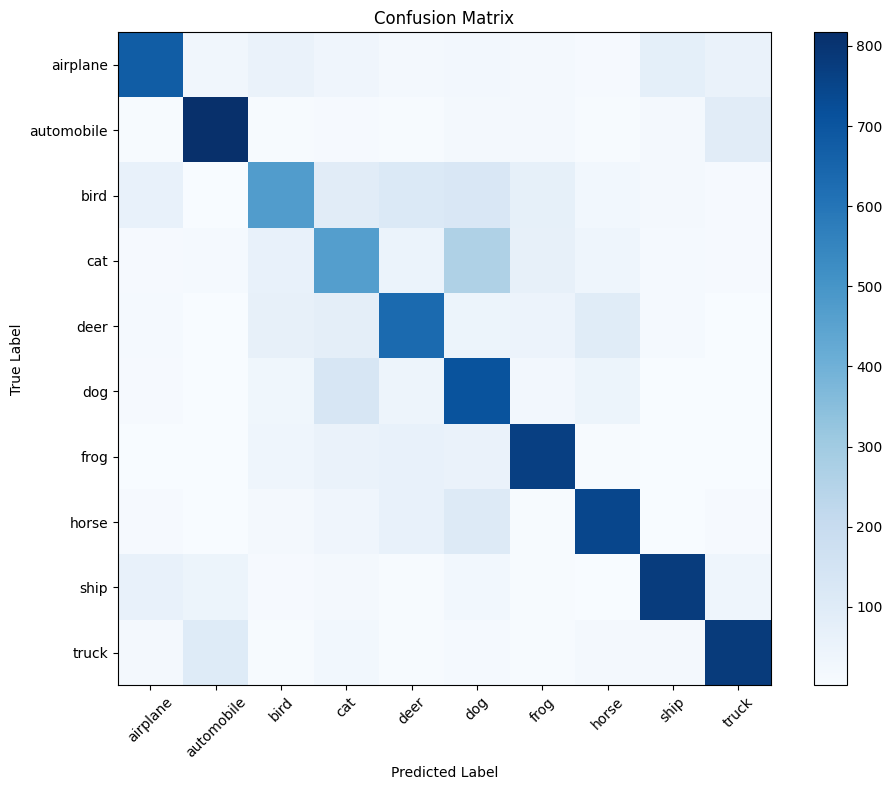

In [109]:
y_pred_prob = new_model_2.predict(x_test, verbose=1)
y_pred = y_pred_prob.argmax(axis=-1)

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print classification report

target_names = np.unique(y_test).astype(str)
print(y_test)
print(target_names)
print(classification_report(y_test, y_pred, target_names=target_names))

# Plot confusion matrix
plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

target_names = [str(value) for value in category_dict.values()]
# print(target_names)

tick_marks = np.arange(len(target_names))
plt.xticks(tick_marks, target_names, rotation=45)
plt.yticks(tick_marks, target_names)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

### Analisis:
#### 1. Eksperimen 1 dengan hyperparameter default menghasilkan rerata akurasi 72%
#### 2. Eksperimen 2 dengan hyperparameter earlystopping yang memonitor "loss" menghasilkan rerata akurasi 71%
#### 3. Eksperimen 3 dengan hyperparameter earlystopping, penjadwalan learning rate, batch size = 64, dan memonitor "val_loss" menghasilkan rerata akurasi 68%
#### 4. merujuk pada poin 1-3, perlakukan tuning hyperparameter belum optimal dengan konfigurasi network layer yang masih sederhana sehingga diperlukan penambahan blok layer konvolusi untuk menambah informasi/fitur.


### 6. Hasil Kuis Chapter 4

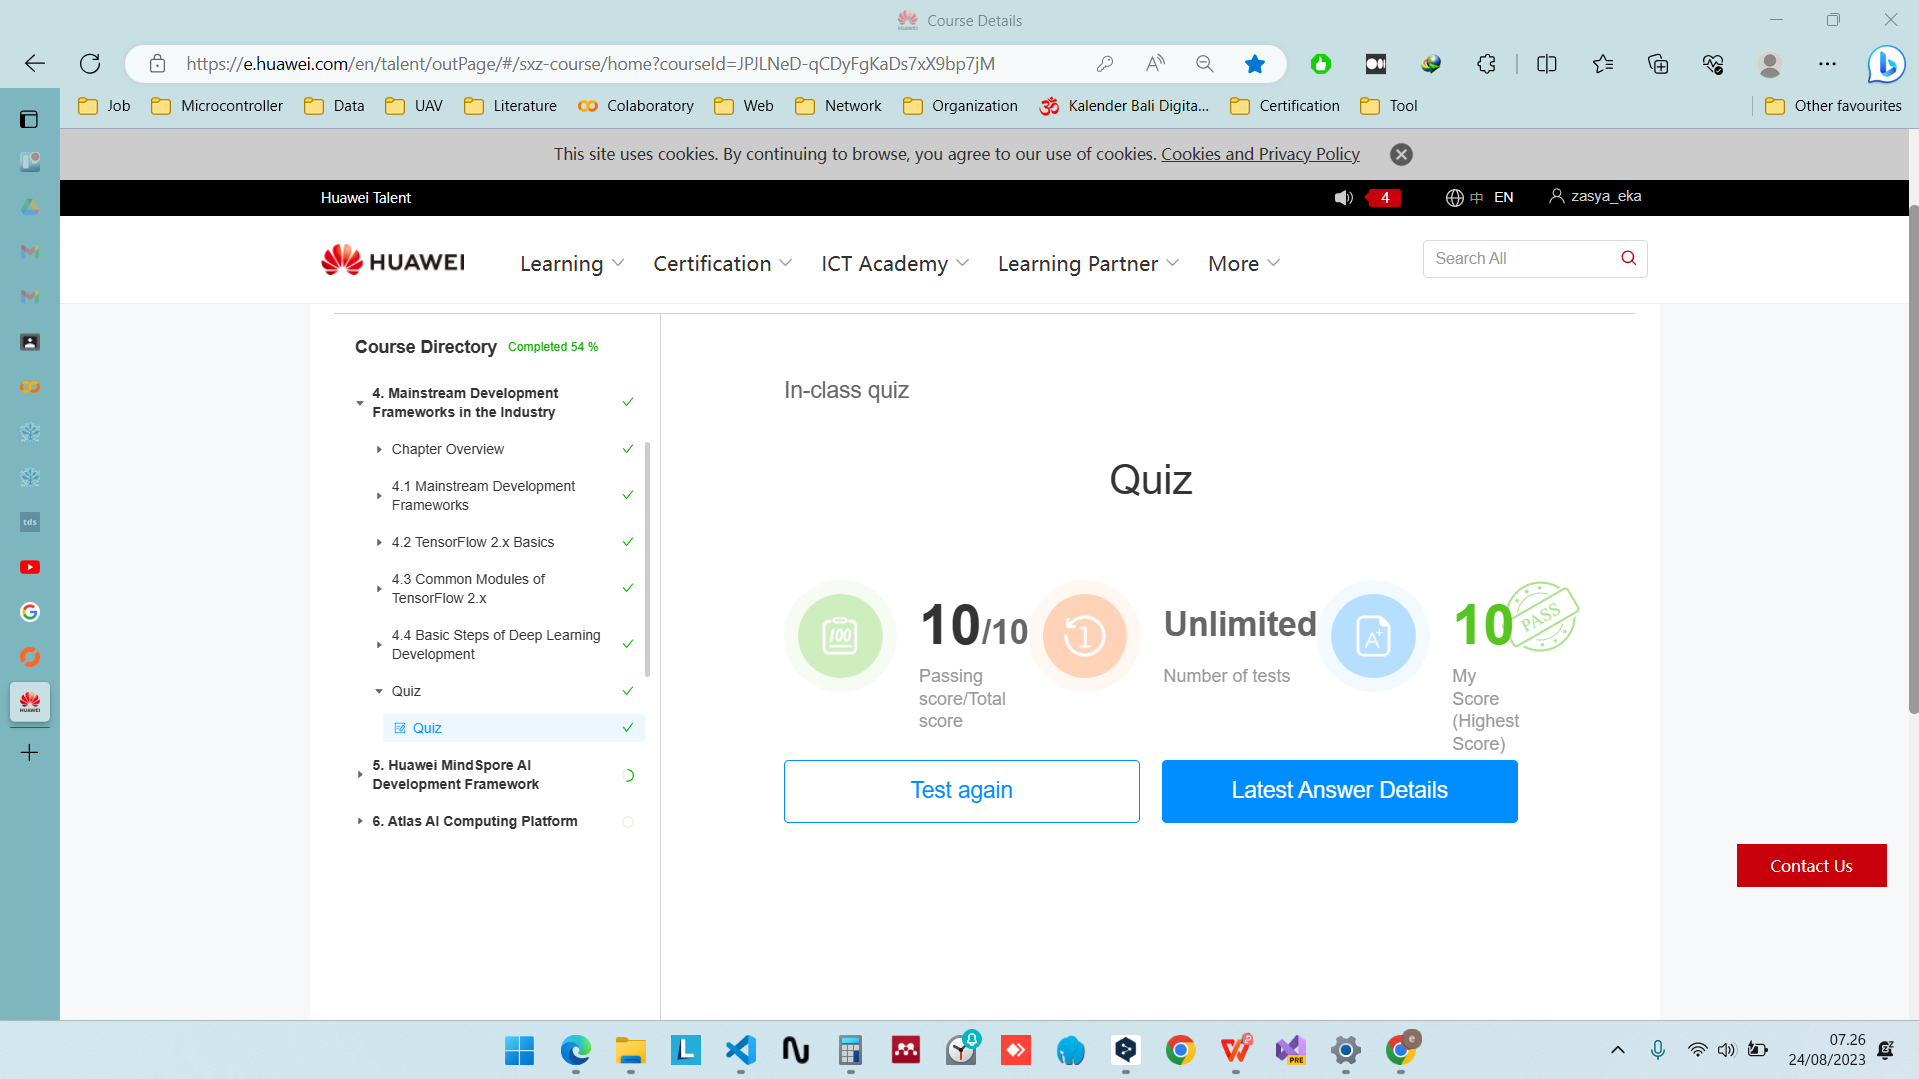